
# Capstone Prject
# Submitted By: Tejaswani Yadav

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Business Understanding

Customer churn is a SaaS business metric that measures the amount of customers, accounts, contracts, bookings, etc. that a business has lost over a period of time. Also known as the rate of attrition or just plain “churn”, customer churn is one of the most widely-tracked and heavily-discussed subscription company metrics.So we our dataset is from watson we will find the churn to know the group of people's reaction.

We will able to know the effect of various schemes and it affect on the customers on these basis having different conditions and preferences.
Customer churn is typically expressed as a rate or a ratio (“churn rate of 12%”), but can also be expressed as a whole number (“we churned 12K of ARR” or “we churned two customers”). When discussed as a rate, customer churn is the inverse of your renewal rate. Thus, an 80% renewal rate is the equivalent of a 20% customer churn rate. Whereas a measure of customer churn captures the amount of customers that your business loses, renewal rate captures the amount that stay.

Customer churn rate, also known as customer attrition rate or customer turnover rate, is a critical metric in subscriptions. Knowing how many customers are leaving your company lets you gauge your financial health and get actionable insights into subscriber behavior and preferences.
The advantage of calculating a company's churn rate is that it provides clarity on how well the business is retaining customers, which is a reflection on the quality of the service the business is providing, as well as its usefulness.

# Data Understanding

In this dataset we can see that CustomerID is the primary key having unique values.Churn column has to predicted using the entire data. There are columns like senior citezen, tenure and monthly charges are int or float type and everything else is object type so we need to convert the total charges into a float type to derive good conclusions.the other columns are mostly categorical like partner, dependents,PhoneServices etc.We will have to convert the categorical columns into the indicator variable.We will also find the null values in the columns and handle them appropriately.Since we are going to predict the churn we will make it into a 0 and 1 format.We will convert the totalcharges and monthlycharges column into float values.


In [229]:
# Reading the dataset with pandas file
df=pd.read_csv("Customer_Churn_Dataset.csv")


In [230]:
# Displaying top 5 records
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [231]:
# Describing the dataset and knowing the no of rows mean value of each column,standard deviation,minimum value,maximum value, 50% , upper quartile and lower quartile of each column. 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [232]:
# Find the datatype of the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [233]:
# Discovering the null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [234]:
# Finding column names with their values and how many are null in them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [235]:
# Droping all the na values
df.dropna(inplace = True)
# Replacing the yes with 1 and No with 0
df['Churn']=df['Churn'].replace(['Yes','No'],[1,0])
# Converting these object columns to numeric columns ignoring the blank values
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df['MonthlyCharges']=pd.to_numeric(df['MonthlyCharges'],errors = 'coerce')

In [236]:
# Finding the correction of each column to all columns in the dataset having numeric datatype
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


In [237]:
# Converting the categorical data with the indicator data
df_encoding = pd.get_dummies(df.iloc[:,1:])

In [238]:
# displaying the top 5 records to cross verify the categorical columns into the indicator
df_encoding.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Visualization 1
A bar graph can be defined as a graphical representation of data, quantities, or numbers using bars or strips. They are used to compare and contrast different types of data, frequencies, or other measures of distinct categories of data.

<AxesSubplot:>

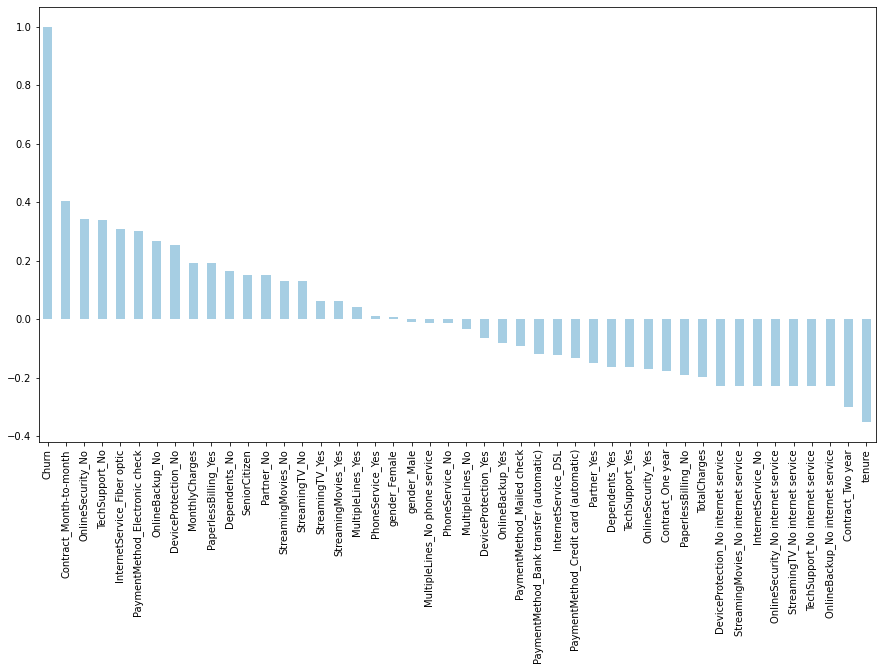

In [267]:
# Ploting correlation into the bargraph and sorting the values in desending order.
plt.figure(figsize=(15,8))
df_encoding.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',colormap='Paired')

In the above plot we are finding the correlation of churn with all the columns and sorting them in desending order. As we can see the maximum corelation is with churn only so it is 1 but we will not take it into account.so second is contract_month-to-month with 0.4 with positive corelation. and the negative correction is tenure.so the model will have alot of wieghtage of the features having more correlations like contact_month-to-month,onlineSecurity_no,OnlineSecurity_No and so on.

# Visualization 2
Catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables. The first named variable is innermost on the display; that is, its categories vary fastest. catplot is a wrapper for graph hbar (default) or graph bar or graph dot.

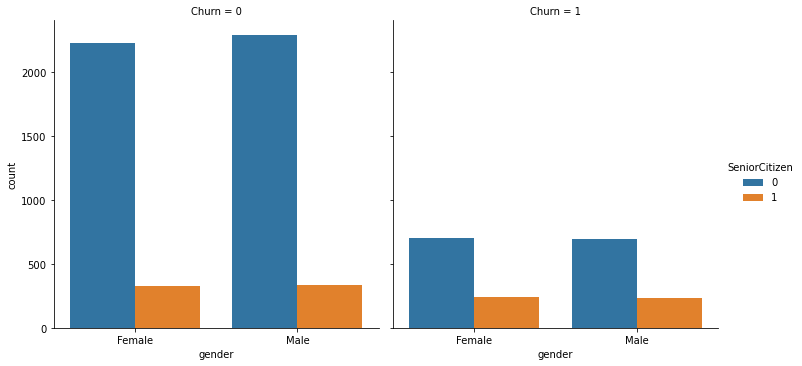

In [242]:
# Catplot for senior citizen gender for churn
sns.catplot(x='gender', kind='count',hue='SeniorCitizen',col='Churn', data=df)
plt.show()

In the above graph we can see the two graphs one says churn is 0 when the custumer remains our customer after showing any promotion or deal.So the non-seniorcitizens are more both male and female but less number of senior citizens including bothe the genders. 

When churn is 1 that means that the customer is no more our customer after deal and promotions there more no of customer who are non-seniorcitizens are going than the senior citizens including male and female.

My over all analysis says that due to some promotions or discounts does not make much difference for seniorcitizens but alot of non seniorcitizens are being influenced by then and the fewer non citizens are leaving the company than the senior citizens including both the genders.


# Visualization 2
Scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.


In [266]:
import plotly.express as px
colorscales = px.colors.named_colorscales()
df = df
fig = px.scatter(df, x="MonthlyCharges", y="tenure",opacity=0.6, color="Churn", color_continuous_scale='teal')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='white')),
                  selector=dict(mode='markers'))

fig.show()

Here we can see the green point and the white dots. so the geen points show that the value is 1 and white says that its 0 so if the point white that means the customer stays with us and if green then we lost the customer.On x-axis we can see the monthly charges and on the y-axis is tenure.
If the is more and the monthly charges are less then we will not lose the customer if the customer is new or the tenure is less but the monthly charges are more then the customers tenure is less then there is high chance that customer will no longer will stay.
Overall the cluster is more towards the left top corner since the chareges are less and the customer is with us. and the tenure is less but the charges are more then tenure.
So to retain the customers we should reduce the monthly charges and give some promotions in it.

In [244]:
# After all the analysis the final check is required for the data that is it ready to
# model or not. we need to check mainly for the null values. since we can see the null value in monthlycharges.
df_encoding.isnull().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

# Data Preparation
We usually check for the null values and handle it.
Second important this is to split the data into two sets as test data and train data. both test and train data will will be having the features and the target value.Then we will normalise the data and we will normalize the test data from the train data.

In [245]:
# We will fill those na values with zeros
df_encoding['TotalCharges']=df_encoding['TotalCharges'].fillna(0)

In [246]:
# Refonfirming
df_encoding.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [247]:
y = df_encoding['Churn'].values# Target Variable
X = df_encoding.drop(columns = ['Churn'])# Features

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler# Normalization
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [248]:
from sklearn.model_selection import train_test_split# Spliting the data into test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

# Modeling
Model is a program that can find patterns or make decisions from a previously unseen dataset. For example, in natural language processing, machine learning models can parse and correctly recognize the intent behind previously unheard sentences or combinations of words.

## Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure.

In [261]:
from sklearn.linear_model import LogisticRegression
modelLP = LogisticRegression(max_iter=150)
result = modelLP.fit(X_train, y_train)

In [262]:
from sklearn import metrics
prediction_test = modelLP.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7936583057264552


In [263]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction_test)

array([[1376,  150],
       [ 286,  301]], dtype=int64)

## Random Forest
A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms. This algorithm is applied in various industries such as banking and e-commerce to predict behavior and outcomes.

In [264]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1500 , oob_score = True, n_jobs = -1,
                                   max_features = "auto",
                                  max_leaf_nodes = 50)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7903454803596782


## SVM
“Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. 

In [265]:
from sklearn.svm import SVC

modelSvm = SVC(kernel='linear') 
modelSvm.fit(X_train,y_train)
preds = modelSvm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7884524372929484

# Evaluation

Since We run three models(Logistic Regression,Random Forest and SVM) each having different accuracies and in our case the accuricies are very my similar. I would recommend Linear regression at random state 121 for our dataset having a good accuracy of 0.793 even though Random forest is also very close to the best accuracy.My second recommendation will be Ramdom Forest because it is second best accuracy apart from that it is one of the best models for biased data so going for it can be a good choice.